In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)



In [2]:

# Load data from CSV
df = pd.read_csv('https://raw.githubusercontent.com/zeroday-zaddy/cs422-project/main/data/strains_cleaned.csv')

# Drop rows with missing values
df = df.dropna()

# Define features (X) and binary target variable (y)
X_columns = ['Type', 'Rating', 'Num_Reviews', 'THC%', 'Other_Cannabinoids', 'Terpene']
y_column = 'Main_Effect'


In [3]:

# Binary classification: 1 if Main_Effect is "Sleepy", 0 otherwise
df['Binary_Target'] = (df[y_column] == 'Sleepy').astype(int)


In [5]:

X = df[X_columns]
y = df['Binary_Target']

# Encode categorical variables
X_encoded = pd.get_dummies(X)

print(X_encoded.columns)
X_encoded.head(5)


Index(['Rating', 'Num_Reviews', 'Type_Hybrid', 'Type_Indica', 'Type_Sativa',
       'THC%_THC 10%', 'THC%_THC 11%', 'THC%_THC 12%', 'THC%_THC 13%',
       'THC%_THC 14%', 'THC%_THC 15%', 'THC%_THC 16%', 'THC%_THC 17%',
       'THC%_THC 18%', 'THC%_THC 19%', 'THC%_THC 20%', 'THC%_THC 21%',
       'THC%_THC 22%', 'THC%_THC 23%', 'THC%_THC 24%', 'THC%_THC 25%',
       'THC%_THC 26%', 'THC%_THC 27%', 'THC%_THC 28%', 'THC%_THC 29%',
       'THC%_THC 30%', 'THC%_THC 31%', 'THC%_THC 8%', 'THC%_THC 9%',
       'Other_Cannabinoids_CBC 1%', 'Other_Cannabinoids_CBD 0%',
       'Other_Cannabinoids_CBD 1%', 'Other_Cannabinoids_CBD 8%',
       'Other_Cannabinoids_CBD 9%', 'Other_Cannabinoids_CBG 1%',
       'Other_Cannabinoids_CBG 2%', 'Other_Cannabinoids_CBG 3%',
       'Other_Cannabinoids_THCV 1%', 'Other_Cannabinoids_THCV 4%',
       'Terpene_Caryophyllene', 'Terpene_Limonene', 'Terpene_Linalool',
       'Terpene_Myrcene', 'Terpene_Ocimene', 'Terpene_Pinene',
       'Terpene_Terpinolene'],
      

,Rating,Num_Reviews,Type_Hybrid,Type_Indica,Type_Sativa,THC%_THC 10%,THC%_THC 11%,THC%_THC 12%,THC%_THC 13%,THC%_THC 14%,...,Other_Cannabinoids_CBG 3%,Other_Cannabinoids_THCV 1%,Other_Cannabinoids_THCV 4%,Terpene_Caryophyllene,Terpene_Limonene,Terpene_Linalool,Terpene_Myrcene,Terpene_Ocimene,Terpene_Pinene,Terpene_Terpinolene
1,4.6,2219.0,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,4.3,8264.0,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,4.6,1073.0,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6,4.4,7409.0,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7,4.5,857.0,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [36]:
import numpy as np
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y, random_state=42)


C_vals = np.logspace(start=1,stop=3, num=50)
train_scores = np.array([])
test_scores = np.array([])
for C in C_vals:
    print(C)
    # Create and train a Logistic Regression model
    # Had to add C to increase accuracy
    logistic_regression_S = LogisticRegression(C=C, random_state=42)
    logistic_regression_S.fit(X_train, y_train)

    # Print training set score
    train_score = logistic_regression_S.score(X_train, y_train)
    train_scores = np.append(train_scores, train_score)
    #print("Training Set Score:", train_score)

    # Print test set score
    test_score = logistic_regression_S.score(X_test, y_test)
    test_scores = np.append(test_scores, test_score)
    #print("Test Set Score:", test_score)


10.0
10.985411419875584
12.067926406393289
13.257113655901088
14.563484775012437
15.998587196060582
17.57510624854792
19.306977288832496
21.209508879201906
23.29951810515372
25.59547922699536
28.11768697974231
30.888435964774818
33.93221771895328
37.2759372031494
40.94915062380423
44.98432668969444
49.417133613238335
54.286754393238596
59.63623316594643
65.51285568595509
71.96856730011521
79.06043210907697
86.85113737513525
95.40954763499938
104.81131341546852
115.1395399326447
126.48552168552958
138.94954943731375
152.64179671752333
167.68329368110065
184.20699693267164
202.35896477251555
222.29964825261956
244.205309454865
268.26957952797244
294.705170255181
323.74575428176433
355.64803062231283
390.6939937054613
429.1934260128778
471.486636345739
517.9474679231213
568.9866029018293
625.0551925273969
686.6488450042998
754.3120063354615
828.6427728546843
910.2981779915218
1000.0


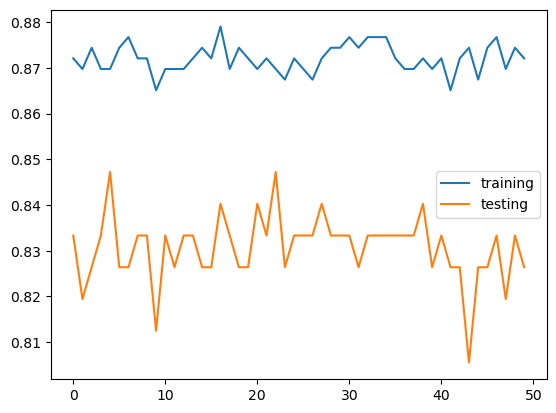

In [37]:

plt.plot(train_scores, label='training')
plt.plot(test_scores, label='testing')
#plt.xticks(ticks=np.arange(C_vals.shape[0]),labels=C_vals,rotation=45)
plt.legend()

#plt.xticks(C_vals)